#Rise of Corona Virus globally based on the timeline

In [2]:
import pandas as pd             # used to create dataframe and work with data 
import matplotlib.pyplot as plt    #used to plot graph 
from matplotlib import style
style.use('ggplot')    #this will help put a grid kind of structure in background of graphs        
%matplotlib inline          

import plotly      #data visualization library
import plotly.express as px     #wrapper of plotly
import plotly.graph_objects as go    #this will help us to use plotly in a object oriented manner will be mentioned below in the code
plt.rcParams['figure.figsize']=18,10    #this will automatically create bigger plots
import cufflinks as cf    #helps us use panda with plotly in a easy way(binds them together)
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot      #this is used so that we can use the plotly offline as well

import folium     #will help us use maps 
   


In [9]:
df=pd.read_csv(r'C:\Users\harsh\OneDrive\Desktop\Projects\Covid 19\covid_19_data.csv',parse_dates=['Last Update'])
#parse date is used to change the format of the date in the last update column

In [19]:
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)

In [20]:
df

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5885,5886,03/15/2020,Gibraltar,UK,2020-03-14 16:33:03,1.0,0.0,1.0
5886,5887,03/15/2020,NaN,Uzbekistan,2020-03-15 18:20:19,1.0,0.0,0.0
5887,5888,03/15/2020,Diamond Princess cruise ship,Australia,2020-03-14 02:33:04,0.0,0.0,0.0
5888,5889,03/15/2020,West Virginia,US,2020-03-10 02:33:04,0.0,0.0,0.0


In [21]:
#Now we can query a single country as well to check its values
df.query('Country=="Australia"')

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
80,81,01/23/2020,NaN,Australia,2020-01-23 17:00:00,0.0,0.0,0.0
166,167,01/25/2020,NaN,Australia,2020-01-25 17:00:00,4.0,0.0,0.0
212,213,01/26/2020,NaN,Australia,2020-01-26 16:00:00,4.0,0.0,0.0
265,266,01/27/2020,New South Wales,Australia,2020-01-27 23:59:00,4.0,0.0,0.0
266,267,01/27/2020,Victoria,Australia,2020-01-27 23:59:00,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5777,5778,03/15/2020,Western Australia,Australia,2020-03-14 13:33:04,17.0,1.0,0.0
5808,5809,03/15/2020,Tasmania,Australia,2020-03-15 18:20:19,6.0,0.0,0.0
5850,5851,03/15/2020,Australian Capital Territory,Australia,2020-03-14 01:53:03,1.0,0.0,0.0
5851,5852,03/15/2020,Northern Territory,Australia,2020-03-14 01:53:03,1.0,0.0,0.0


In [22]:
#Find Total cases that occured around the globe on a particular date
df.groupby('Date').sum()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0
01/27/2020,12342,2927.0,82.0,61.0
01/28/2020,15262,5578.0,131.0,107.0
01/29/2020,18711,6165.0,133.0,126.0
01/30/2020,23345,8235.0,171.0,143.0


In [25]:
#to find the deaths that occured on different dates
death=df.groupby('Date').sum()['Deaths']

In [26]:
death

Date
01/22/2020      17.0
01/23/2020      18.0
01/24/2020      26.0
01/25/2020      42.0
01/26/2020      56.0
01/27/2020      82.0
01/28/2020     131.0
01/29/2020     133.0
01/30/2020     171.0
01/31/2020     213.0
02/01/2020     259.0
02/02/2020     362.0
02/03/2020     426.0
02/04/2020     492.0
02/05/2020     564.0
02/06/2020     634.0
02/07/2020     719.0
02/08/2020     806.0
02/09/2020     906.0
02/10/2020    1013.0
02/11/2020    1113.0
02/12/2020    1118.0
02/13/2020    1371.0
02/14/2020    1523.0
02/15/2020    1666.0
02/16/2020    1770.0
02/17/2020    1868.0
02/18/2020    2007.0
02/19/2020    2122.0
02/20/2020    2247.0
02/21/2020    2251.0
02/22/2020    2458.0
02/23/2020    2469.0
02/24/2020    2629.0
02/25/2020    2708.0
02/26/2020    2770.0
02/27/2020    2814.0
02/28/2020    2872.0
02/29/2020    2941.0
03/01/2020    2996.0
03/02/2020    3085.0
03/03/2020    3160.0
03/04/2020    3254.0
03/05/2020    3348.0
03/06/2020    3460.0
03/07/2020    3558.0
03/08/2020    3803.0
03/09/20

In [29]:
#we use the data from deaths,recovered and confirmed cases

death=df.groupby('Date').sum()['Deaths'].reset_index()
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
rec=df.groupby('Date').sum()['Recovered'].reset_index()

In [30]:
death

,Date,Deaths
0,01/22/2020,17.0
1,01/23/2020,18.0
2,01/24/2020,26.0
3,01/25/2020,42.0
4,01/26/2020,56.0
5,01/27/2020,82.0
6,01/28/2020,131.0
7,01/29/2020,133.0
8,01/30/2020,171.0
9,01/31/2020,213.0


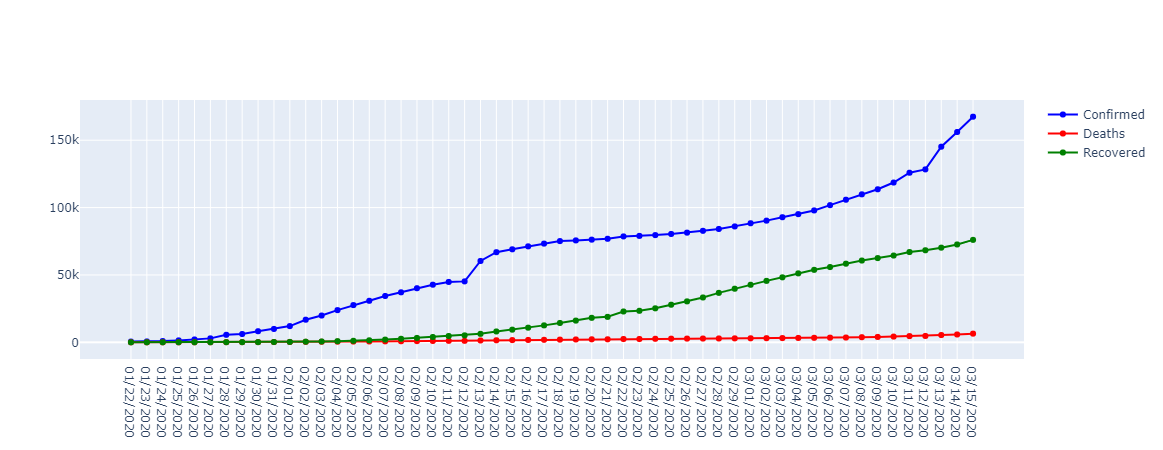

In [37]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed',line=dict(color='blue',width=2)))
fig.add_trace(go.Scatter(x=death['Date'],y=death['Deaths'],mode='lines+markers',name='Deaths',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=rec['Date'],y=rec['Recovered'],mode='lines+markers',name='Recovered',line=dict(color='green',width=2)))

In [38]:
#Cases by Country


In [39]:
df.groupby('Country').sum()

,SNo,Confirmed,Deaths,Recovered
Country,,,,
Azerbaijan,2664,1.0,0.0,0.0
"('St. Martin',)",4675,2.0,0.0,0.0
Afghanistan,78467,74.0,0.0,0.0
Albania,35297,160.0,5.0,0.0
Algeria,75424,286.0,10.0,40.0
...,...,...,...,...
Uzbekistan,5887,1.0,0.0,0.0
Vatican City,16496,4.0,0.0,0.0
Venezuela,11398,12.0,0.0,0.0


In [40]:
d1=df.groupby('Country').sum()['Deaths'].reset_index()
r1=df.groupby('Country').sum()['Recovered'].reset_index()
c1=df.groupby('Country').sum()['Confirmed'].reset_index()

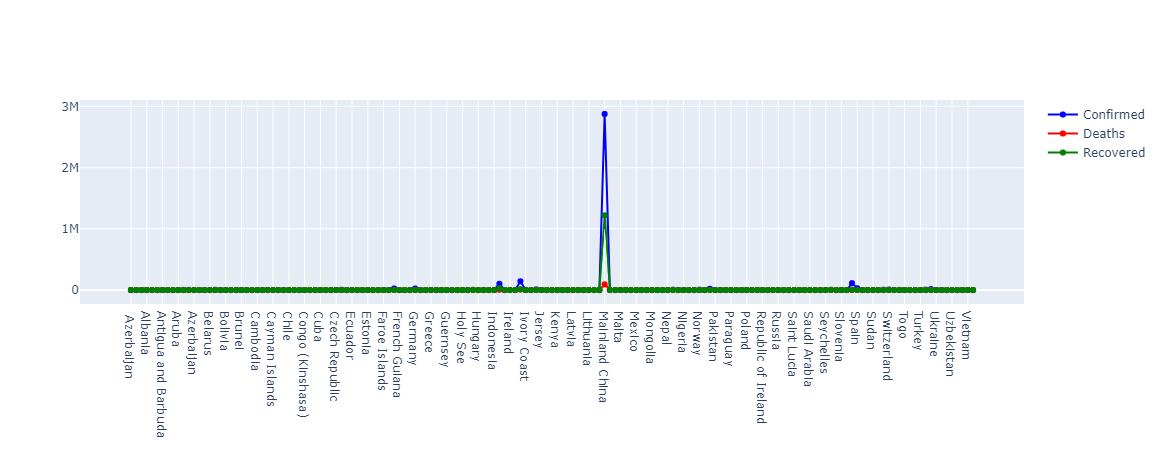

In [42]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=c1['Country'],y=c1['Confirmed'],mode='lines+markers',name='Confirmed',line=dict(color='blue',width=2)))
fig.add_trace(go.Scatter(x=d1['Country'],y=d1['Deaths'],mode='lines+markers',name='Deaths',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=r1['Country'],y=r1['Recovered'],mode='lines+markers',name='Recovered',line=dict(color='green',width=2)))

In [43]:
df

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5885,5886,03/15/2020,Gibraltar,UK,2020-03-14 16:33:03,1.0,0.0,1.0
5886,5887,03/15/2020,NaN,Uzbekistan,2020-03-15 18:20:19,1.0,0.0,0.0
5887,5888,03/15/2020,Diamond Princess cruise ship,Australia,2020-03-14 02:33:04,0.0,0.0,0.0
5888,5889,03/15/2020,West Virginia,US,2020-03-10 02:33:04,0.0,0.0,0.0


In [44]:
df_confirmed=pd.read_csv(r'C:\Users\harsh\OneDrive\Desktop\Projects\Covid 19\time_series_covid_19_confirmed.csv')

In [49]:
df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)

In [50]:
df_confirmed

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,NaN,Saint Lucia,13.9094,-60.9789,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
438,NaN,Saint Vincent and the Grenadines,12.9843,-61.2872,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
439,NaN,Suriname,3.9193,-56.0278,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
440,"Virgin Islands, U.S.",US,18.3358,-64.8963,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
df_latlong=pd.merge(df,df_confirmed,on=['Country','Province/State'])

In [52]:
df_latlong

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,32,01/22/2020,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
1,70,01/23/2020,Washington,US,2020-01-23 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
2,118,01/24/2020,Washington,US,2020-01-24 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
3,159,01/25/2020,Washington,US,2020-01-25 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
4,203,01/26/2020,Washington,US,2020-01-26 16:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,5879,03/15/2020,NaN,Saint Vincent and the Grenadines,2020-03-14 16:33:03,1.0,0.0,0.0,12.9843,-61.2872,...,0,0,0,0,0,0,0,0,0,1
3286,5625,03/14/2020,NaN,Suriname,2020-03-14 16:33:03,1.0,0.0,0.0,3.9193,-56.0278,...,0,0,0,0,0,0,0,0,0,1
3287,5881,03/15/2020,NaN,Suriname,2020-03-14 16:33:03,1.0,0.0,0.0,3.9193,-56.0278,...,0,0,0,0,0,0,0,0,0,1
3288,5628,03/14/2020,"Virgin Islands, U.S.",US,2020-03-14 16:15:18,1.0,0.0,0.0,18.3358,-64.8963,...,0,0,0,0,0,0,0,0,0,1


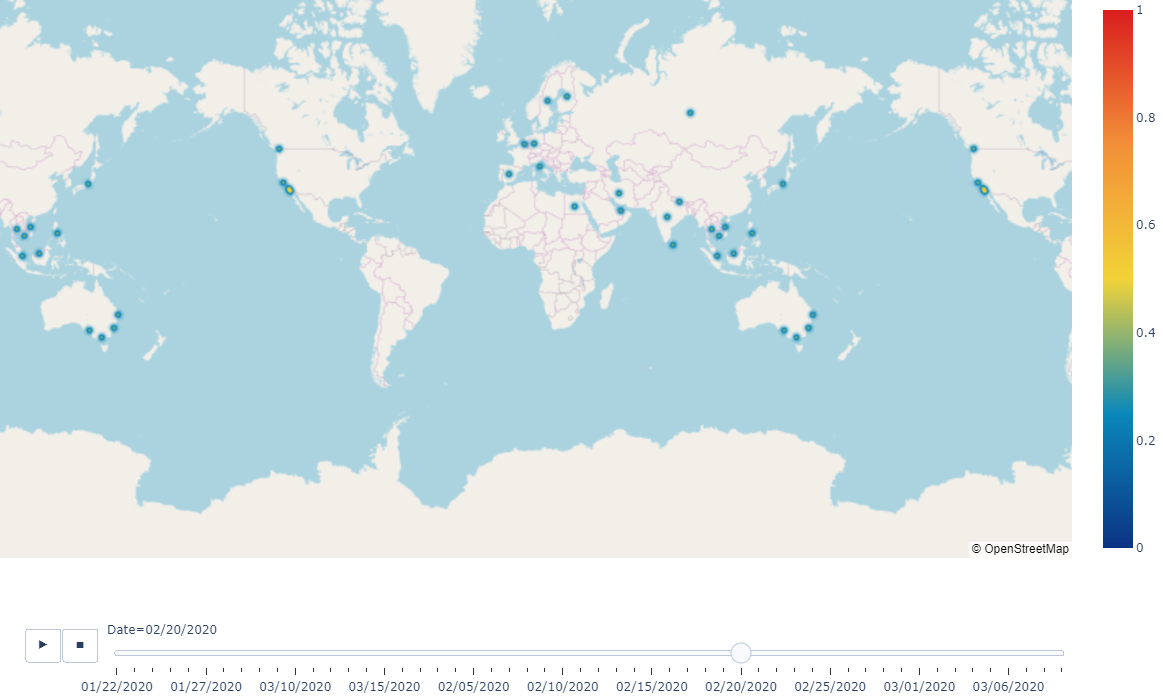

In [54]:
fig=px.density_mapbox(df_latlong,lat='Lat',lon='Long',hover_name='Province/State',hover_data=['Confirmed','Deaths','Recovered'],animation_frame='Date',color_continuous_scale='Portland',radius=7,zoom=0,height=700)
fig.update_layout(title='Worldwide CoronaVirus Cases')
fig.update_layout(mapbox_style='open-street-map',mapbox_center_lon=0)
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})